### Principal Component Analysis

PCA is linear transformation that finds "principal components" or the direction of greatest variance, in a data set. t can be used for dimension reduction among other things. In this exercise we're first tasked with implementing PCA 

Lets apply PCA to a simple 2-dimensional data set to see how it works. Let's start off by loading and visualizing the data set.

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat 

import matplotlib.pyplot as plt  
import seaborn as sb  
%matplotlib inline

In [5]:
DATAPATH = '../../datasets/'
data = loadmat(os.path.join(DATAPATH, 'ex7data1.mat'))
pd_data = pd.DataFrame(data['X'], columns=['col1', 'col2'])

In [6]:
pd_data.shape

(50, 2)

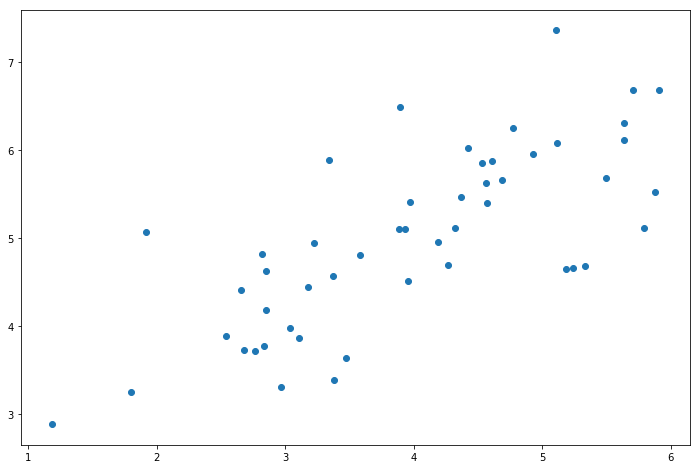

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pd_data.iloc[:,0],pd_data.iloc[:,1])

The algorithm for PCA is fairly simple. After ensuring that the data is normalized, the output is simply the singular value decomposition of the covariance matrix of the original data. Since numpy already has built-in functions to calculate the covariance and SVD of a matrix, we'll use those rather than build from scratch.

In [25]:
def pca(X):
    #normalize data
    X = X - X.mean()/X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

def project_data(X, U, k):  
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

def recover_data(Z, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [20]:
U, S, V = pca(pd_data) 

In [21]:
U, S, V

(matrix([[-0.81592332, -0.57816012],
         [-0.57816012,  0.81592332]]),
 array([ 2.35576024,  0.37860889]),
 matrix([[-0.81592332, -0.57816012],
         [-0.57816012,  0.81592332]]))

Now that we have the principal components (matrix U), we can use these to project the original data into a lower-dimensional space. For this task we'll implement a function that computes the projection and selects only the top K components, effectively reducing the number of dimensions

where U will contain the principal components and S will contain a diagonal matrix.

In [26]:
Z = project_data(pd_data, U, 1)  

We can also attempt to recover the original data by reversing the steps we took to project it.

In [27]:
X_recovered = recover_data(Z, U, 1)  
X_recovered 

matrix([[ 3.84997146,  2.72807494],
        [ 5.77596321,  4.09282527],
        [ 3.84925878,  2.72756994],
        [ 3.59359026,  2.54640421],
        [ 3.86477268,  2.73856303],
        [ 5.65093244,  4.00422895],
        [ 4.02769033,  2.85400585],
        [ 7.08688173,  5.02173708],
        [ 5.0206983 ,  3.55764747],
        [ 5.68965796,  4.0316697 ],
        [ 5.59135788,  3.96201464],
        [ 5.48661724,  3.88779583],
        [ 5.12783908,  3.63356701],
        [ 5.69013316,  4.03200643],
        [ 3.66540942,  2.59729499],
        [ 6.72921405,  4.76829515],
        [ 5.79232306,  4.1044178 ],
        [ 4.080133  ,  2.89116652],
        [ 6.8754621 ,  4.87192595],
        [ 5.64211055,  3.99797779],
        [ 6.95122041,  4.92560799],
        [ 4.64874309,  3.29408144],
        [ 6.6415276 ,  4.70616086],
        [ 5.05048724,  3.57875579],
        [ 3.52108528,  2.49502746],
        [ 4.47777578,  3.17293466],
        [ 6.09089958,  4.31598797],
        [ 6.26635518,  4.440

If we then attempt to visualize the recovered data, the intuition behind how the algorithm works becomes really obvious.

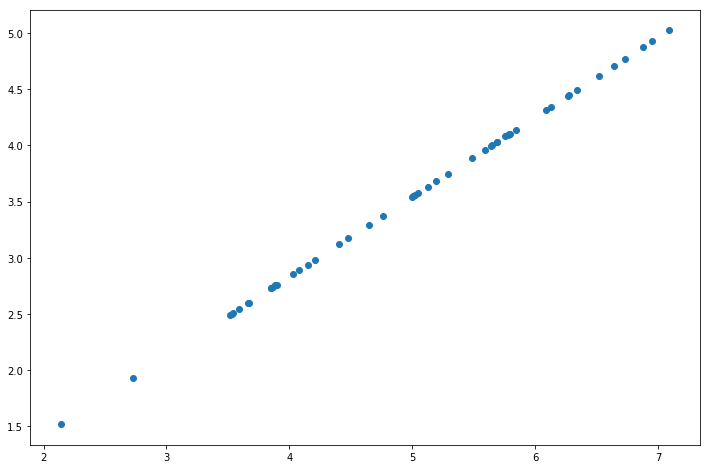

In [35]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter([X_recovered[:,0]], [X_recovered[:, 1]])  

Notice how the points all seem to be compressed down to an invisible line. That invisible line is essentially the first principal component. The second principal component, which we cut off when we reduced the data to one dimension, can be thought of as the variation orthogonal to that line. Since we lost that information, our reconstruction can only place the points relative to the first principal component.

### PCA for Images

Applying PCA to images of faces. By using the same dimension reduction techniques we can capture the "essence" of the images using much less data than the original images.

In [41]:
faces = loadmat(os.path.join(DATAPATH, 'ex7faces.mat'))  
X = faces['X']  
X.shape  

(5000, 1024)

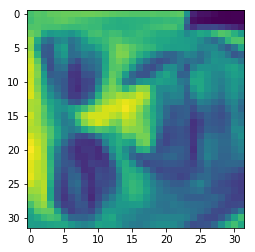

In [53]:
face = np.reshape(X[4,:], (32, 32))  
plt.imshow(face) 

These are only 32 x 32 grayscale images though (it's also rendering sideways, but we can ignore that for now). Our next step is to run PCA on the faces data set and take the top 100 principal components.

In [48]:
U, S, V = pca(X)  
Z = project_data(X, U, 100)

Now we can attempt to recover the original structure and render it again.

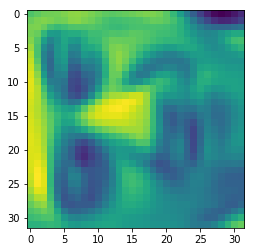

In [54]:
X_recovered = recover_data(Z, U, 100)  
face = np.reshape(X_recovered[4,:], (32, 32))  
plt.imshow(face)  

Notice that we lost some detail, though not as much as you might expect for a 10x reduction in the number of dimensions.